In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

df = pd.read_csv("HINGLISH_DATASET_SID.csv") 
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Source.Name    9999 non-null   object 
 1   Column1        9720 non-null   float64
 2   Column2        276 non-null    object 
 3   Date           9996 non-null   object 
 4   Likes          1138 non-null   float64
 5   Comment        9964 non-null   object 
 6   (view source)  9999 non-null   object 
 7   Post ID        9999 non-null   int64  
 8   Label          9999 non-null   object 
 9   Hate_Label     0 non-null      float64
dtypes: float64(3), int64(1), object(6)
memory usage: 781.3+ KB


,Source.Name,Column1,Column2,Date,Likes,Comment,(view source),Post ID,Label,Hate_Label
0,PostID 01 instagram-comments66804c78ca6bc-BxOs...,1.0,NaN,11-05-2019 15:43,NaN,Nice buro yes I am Hussain khan is me happy ow...,https://www.instagram.com/p/BxOsV8Gnauf/c/1786...,1,'HS0',NaN
1,PostID 01 instagram-comments66804c78ca6bc-BxOs...,NaN,01-Jan,13-04-2021 07:27,1.0,@hussainkhansadab teri maa chodate,https://www.instagram.com/p/BxOsV8Gnauf/c/1786...,1,'HS1',NaN
2,PostID 01 instagram-comments66804c78ca6bc-BxOs...,NaN,01-Feb,04-07-2021 17:04,2.0,@hussainkhansadab mohhamad and allah mi maa ki...,https://www.instagram.com/p/BxOsV8Gnauf/c/1786...,1,'HS1',NaN
3,PostID 01 instagram-comments66804c78ca6bc-BxOs...,NaN,01-Mar,30-12-2021 05:29,0.0,@hussainkhansadab Teri maka bhosda lose nikalo...,https://www.instagram.com/p/BxOsV8Gnauf/c/1786...,1,'HSN',NaN
4,PostID 01 instagram-comments66804c78ca6bc-BxOs...,2.0,NaN,14-05-2019 03:30,NaN,Send me,https://www.instagram.com/p/BxOsV8Gnauf/c/1786...,1,'HS0',NaN


In [2]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\phbor\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))


In [ ]:
import nltk
nltk.download('stopwords')
import string
import re
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def clean_comment(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r'@\w+|#', '', text)
    text = re.sub(r'[^\x00-\x7F]+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\d+', '', text)
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df = df[['Date', 'Likes', 'Comment', 'Label']].dropna()
df['Cleaned_Comment'] = df['Comment'].apply(clean_comment)


df[['Comment', 'Cleaned_Comment']].head(10)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\phbor\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Comment,Cleaned_Comment
1,@hussainkhansadab teri maa chodate,teri maa chodate
2,@hussainkhansadab mohhamad and allah mi maa ki...,mohhamad allah mi maa ki choot
3,@hussainkhansadab Teri maka bhosda lose nikalo...,teri maka bhosda lose nikalo madar chod
5,Bhn k lode katwe kaat k fenk denge bc tujhe suar,bhn k lode katwe kaat k fenk denge bc tujhe suar
7,Ye india ke sare muslman babar or akbar ki naj...,ye india ke sare muslman babar akbar ki najaya...
8,Are thari maa ko chodu owesi bhadve,thari maa ko chodu owesi bhadve
9,@adult_story_90 chodo iski maa bhai akele owes...,chodo iski maa bhai akele owesi nai sub mullo ...
10,Teri maa ki chut,teri maa ki chut
11,Madar chod owesi👎👎👎👎👎🖕🖕🖕,madar chod owesi
12,owesi ki maa kaa cholaaa,owesi ki maa kaa cholaaa


In [5]:
!pip install langdetect



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


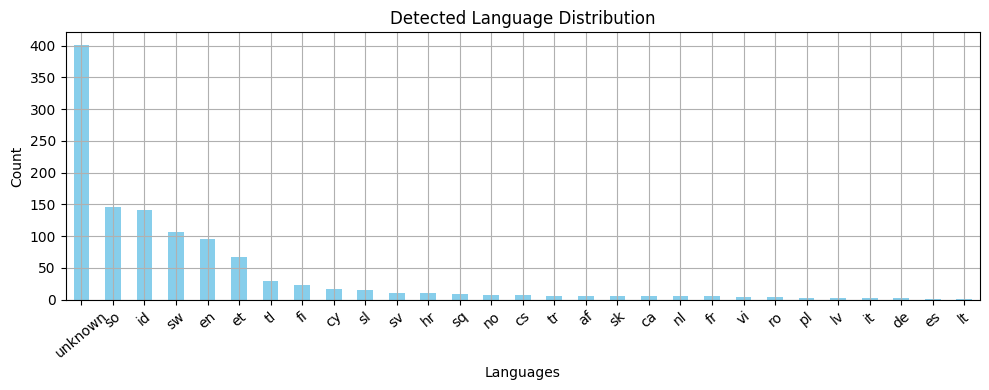

,Cleaned_Comment,Language
1,teri maa chodate,et
2,mohhamad allah mi maa ki choot,so
3,teri maka bhosda lose nikalo madar chod,sl
5,bhn k lode katwe kaat k fenk denge bc tujhe suar,nl
7,ye india ke sare muslman babar akbar ki najaya...,id
8,thari maa ko chodu owesi bhadve,so
9,chodo iski maa bhai akele owesi nai sub mullo ...,pl
10,teri maa ki chut,sw
11,madar chod owesi,cy
12,owesi ki maa kaa cholaaa,so


In [ ]:


from langdetect import detect, DetectorFactory
from langdetect.lang_detect_exception import LangDetectException
import matplotlib.pyplot as plt


DetectorFactory.seed = 0

# Define detection function
def detect_language(text):
    try:
        return detect(text)
    except LangDetectException:
        return "unknown"


df['Language'] = df['Cleaned_Comment'].apply(detect_language)


lang_counts = df['Language'].value_counts()
lang_counts.plot(kind='bar', color='skyblue', figsize=(10, 4), title='Detected Language Distribution')
plt.xlabel("Languages")
plt.ylabel("Count")
plt.xticks(rotation=40)
plt.grid(True)
plt.tight_layout()
plt.show()


df[['Cleaned_Comment', 'Language']].head(10)


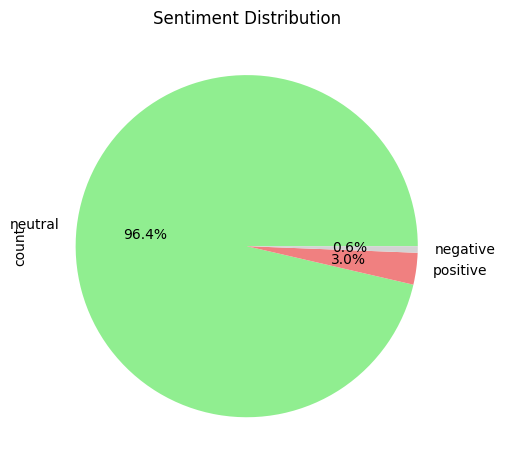

In [ ]:
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from IPython.display import display


def get_sentiment(text, lang):
    if lang == 'en':
        polarity = TextBlob(text).sentiment.polarity
        if polarity > 0.1:
            return "positive"
        elif polarity < -0.1:
            return "negative"
        else:
            return "neutral"
    else:
        return "neutral"  


df['Sentiment'] = df.apply(lambda x: get_sentiment(x['Cleaned_Comment'], x['Language']), axis=1)


df[['Cleaned_Comment', 'Language', 'Sentiment']].head(10)


sentiment_counts = df['Sentiment'].value_counts()
sentiment_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'lightcoral', 'lightgray'],
                      title='Sentiment Distribution')
plt.tight_layout()
plt.show()


In [ ]:

positive_comments = df[df['Sentiment'] == 'positive'][['Cleaned_Comment', 'Language', 'Likes', 'Date']]
negative_comments = df[df['Sentiment'] == 'negative'][['Cleaned_Comment', 'Language', 'Likes', 'Date']]

print("Top 10 Positive Comments:")
display(positive_comments.head(10))

print("Top 10 Negative Comments:")
display(negative_comments.head(10))


Top 10 Positive Comments:


,Cleaned_Comment,Language,Likes,Date
758,gave answers calm way thats really amazing,en,4.0,19-01-2024 10:17
845,background sound ko kam kijiye voice isnt audi...,en,3.0,19-01-2024 18:14
975,man responsible downfall shivsena,en,0.0,22-01-2024 18:01
1531,right jco sab,en,1.0,26-03-2024 02:44
6331,proud hindu,en,11.0,19-06-2024 14:15
6535,proud hindu,en,1.0,19-06-2024 15:05
6681,proud hindu,en,1.0,19-06-2024 15:45
6796,jay shree ram proud hindu,en,1.0,19-06-2024 16:19
6957,peaceful word,en,23.0,19-06-2024 17:00
7078,proud hindu,en,9.0,19-06-2024 17:25


Top 10 Negative Comments:


,Cleaned_Comment,Language,Likes,Date
1492,sorry bulwao bhai isse,en,0.0,16-03-2024 05:52
3704,please tag random sena,en,1.0,17-03-2024 12:12
5547,please tag random sena,en,1.0,10-04-2024 10:03
7641,edited video guys spreading hate,en,1.0,19-06-2024 20:45
7738,muslim totally wrong religion said,en,1.0,19-06-2024 22:01
8333,bc religion hate,en,1.0,20-06-2024 03:56
8608,sorry bro,en,1.0,23-06-2024 10:15


In [10]:

print("Most Liked Negative Comments:")
display(negative_comments.sort_values(by='Likes', ascending=False).head(10))

print("Most Liked Positive Comments:")
display(positive_comments.sort_values(by='Likes', ascending=False).head(10))


Most Liked Negative Comments:


,Cleaned_Comment,Language,Likes,Date
3704,please tag random sena,en,1.0,17-03-2024 12:12
5547,please tag random sena,en,1.0,10-04-2024 10:03
7641,edited video guys spreading hate,en,1.0,19-06-2024 20:45
7738,muslim totally wrong religion said,en,1.0,19-06-2024 22:01
8333,bc religion hate,en,1.0,20-06-2024 03:56
8608,sorry bro,en,1.0,23-06-2024 10:15
1492,sorry bulwao bhai isse,en,0.0,16-03-2024 05:52


Most Liked Positive Comments:


,Cleaned_Comment,Language,Likes,Date
7410,proud hindu,en,99.0,19-06-2024 18:36
6957,peaceful word,en,23.0,19-06-2024 17:00
6331,proud hindu,en,11.0,19-06-2024 14:15
7078,proud hindu,en,9.0,19-06-2024 17:25
8242,proud hindu,en,5.0,20-06-2024 03:32
758,gave answers calm way thats really amazing,en,4.0,19-01-2024 10:17
9743,proud hindu,en,3.0,23-06-2024 07:17
8619,tumhare bhagwan ko main kuch bolu ga tumhe bor...,en,3.0,23-06-2024 06:50
8474,omg really today felt proud hindu,en,3.0,20-06-2024 11:07
845,background sound ko kam kijiye voice isnt audi...,en,3.0,19-01-2024 18:14


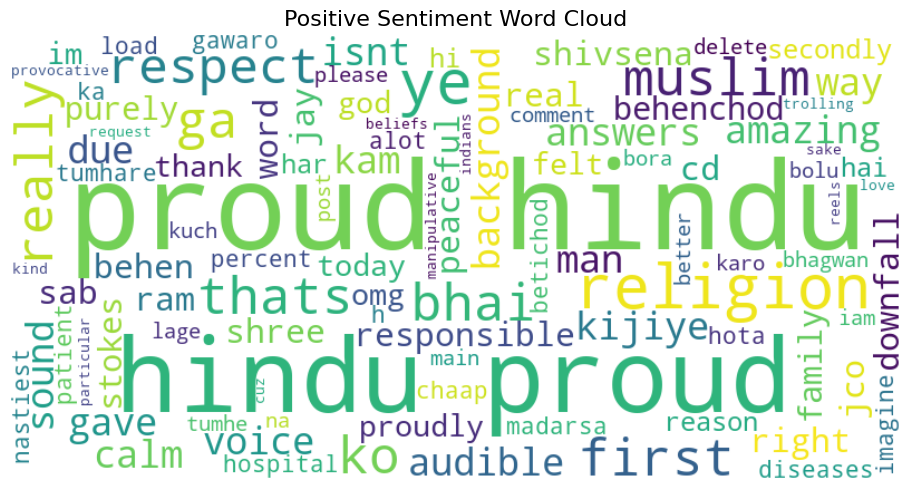

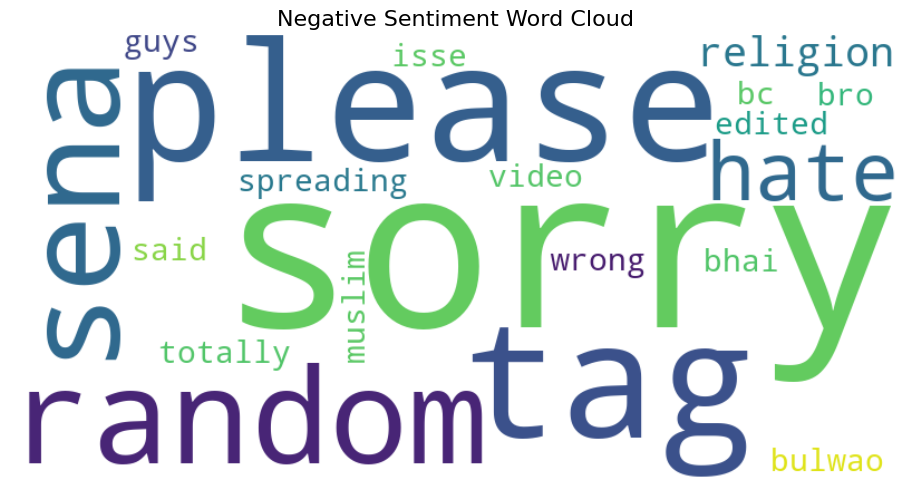

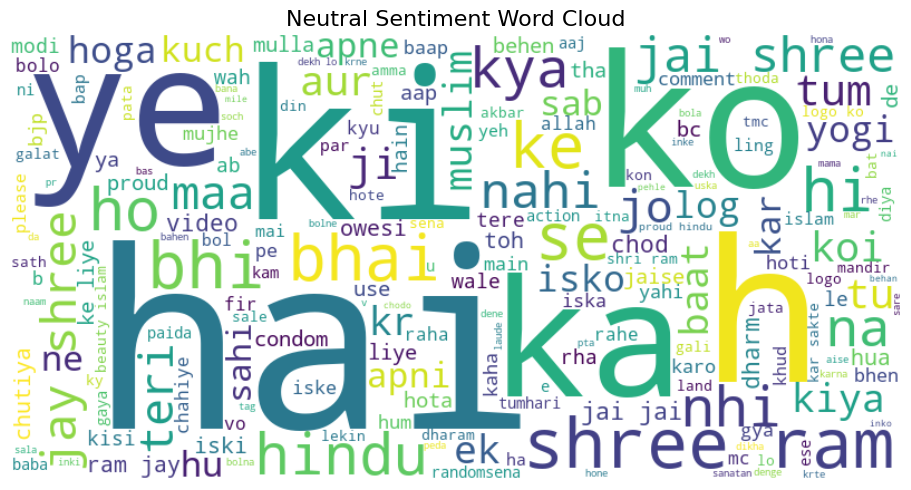

In [ ]:

def generate_wordcloud(text_series, title):
    text = ' '.join(text_series)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.tight_layout()
    plt.show()


generate_wordcloud(df[df['Sentiment'] == 'positive']['Cleaned_Comment'], "Positive Sentiment Word Cloud")
generate_wordcloud(df[df['Sentiment'] == 'negative']['Cleaned_Comment'], "Negative Sentiment Word Cloud")
generate_wordcloud(df[df['Sentiment'] == 'neutral']['Cleaned_Comment'], "Neutral Sentiment Word Cloud")


In [ ]:
custom_stopwords = {
    'positive': {'hindu', 'proud', 'jco', 'isnt', 'im'},
    'negative': {'muslim', 'sena'},
    'neutral': {'hai', 'ka', 'ko', 'ki', 'hi', 'se', 'bhai', 'kr', 'hu', 'kya', 'kisi', 'kuch', 'ye', 'h'}
}


In [ ]:
def generate_custom_wordcloud(text_series, title, sentiment_type):
    text = ' '.join(text_series)
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        stopwords=custom_stopwords.get(sentiment_type, set())
    ).generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.tight_layout()
    plt.show()


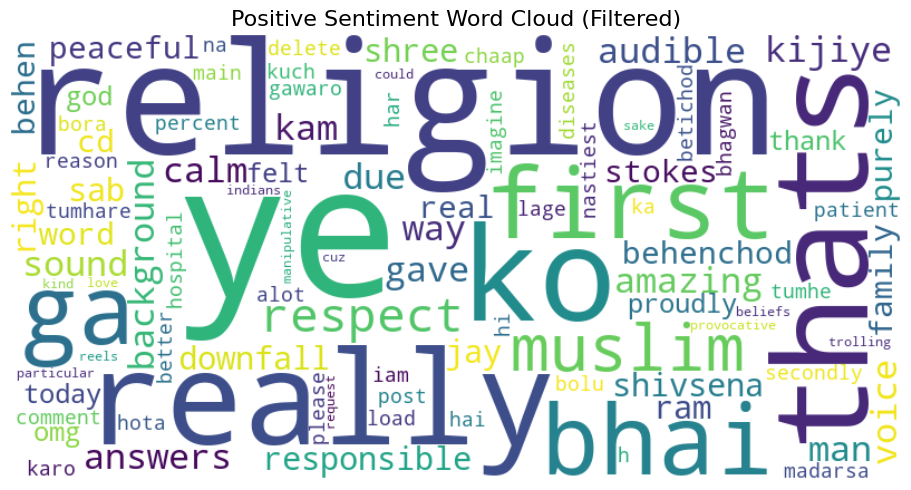

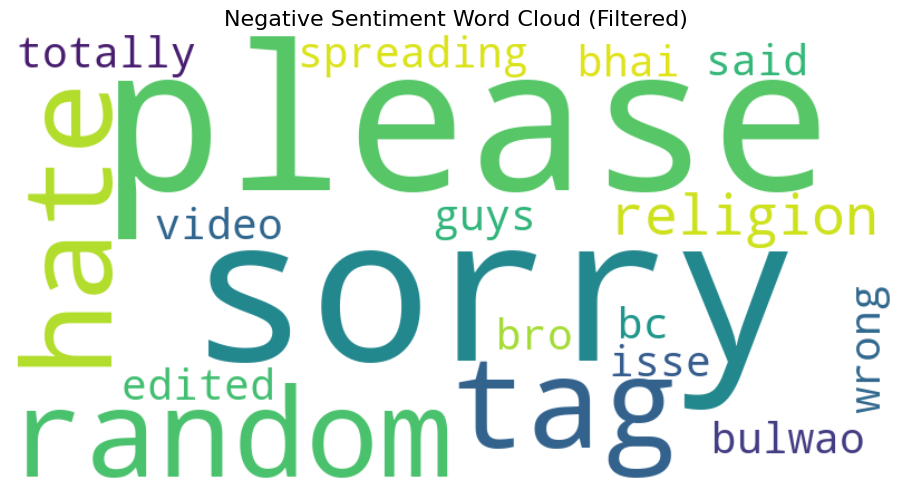

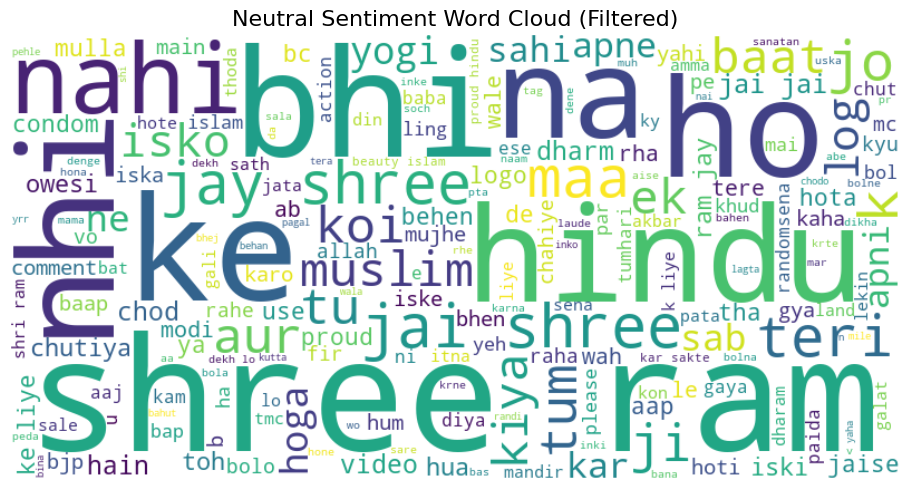

In [ ]:
generate_custom_wordcloud(df[df['Sentiment'] == 'positive']['Cleaned_Comment'],
                          "Positive Sentiment Word Cloud (Filtered)", 'positive')

generate_custom_wordcloud(df[df['Sentiment'] == 'negative']['Cleaned_Comment'],
                          "Negative Sentiment Word Cloud (Filtered)", 'negative')

generate_custom_wordcloud(df[df['Sentiment'] == 'neutral']['Cleaned_Comment'],
                          "Neutral Sentiment Word Cloud (Filtered)", 'neutral')


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

df['Label'] = df['Label'].str.replace("'", "").str.strip()  
label_encoder = LabelEncoder()
df['Encoded_Label'] = label_encoder.fit_transform(df['Label'])

# Applying TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['Cleaned_Comment'])
y = df['Encoded_Label']

# Train-Test Split split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Classification Model
model = SVC(kernel='linear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [ ]:

# Evaluation of the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8370044052863436

Classification Report:
               precision    recall  f1-score   support

         HS0       0.85      0.99      0.92       188
         HS1       0.50      0.07      0.12        28
         HSN       0.33      0.09      0.14        11

    accuracy                           0.84       227
   macro avg       0.56      0.39      0.39       227
weighted avg       0.78      0.84      0.78       227


Confusion Matrix:
 [[187   0   1]
 [ 25   2   1]
 [  8   2   1]]


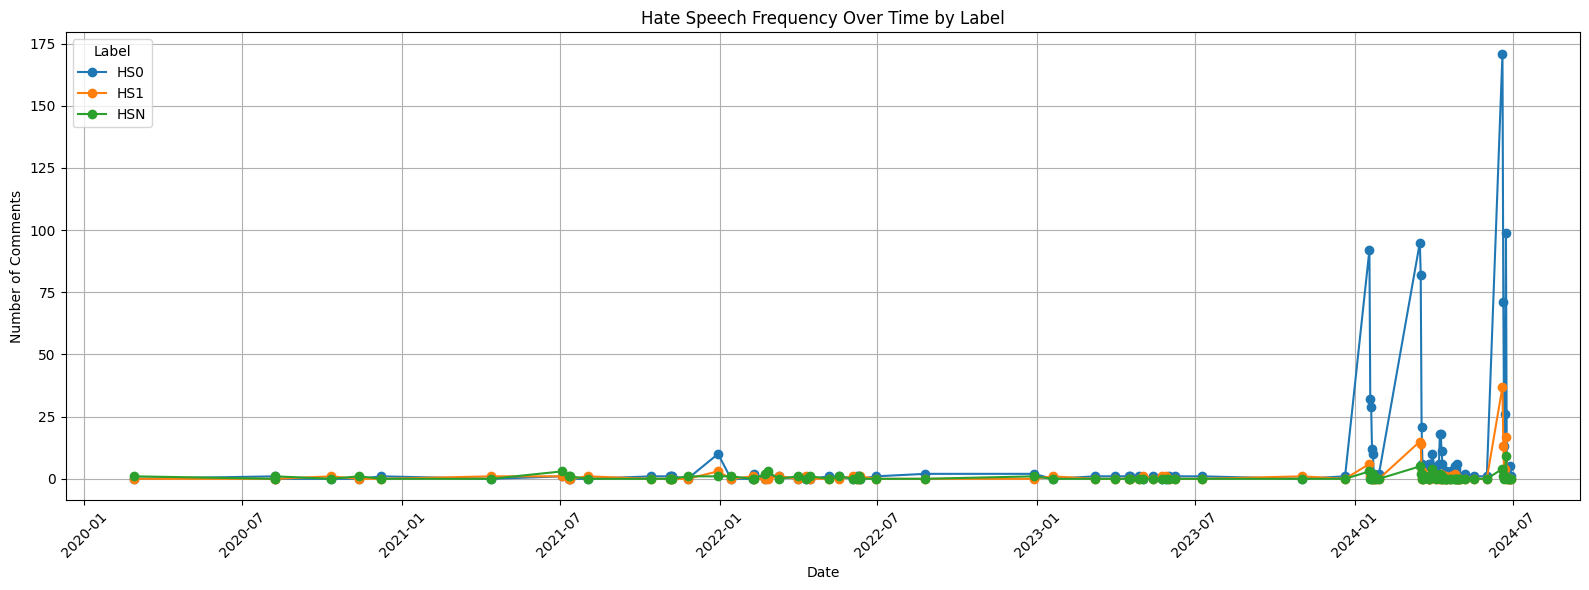

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.dropna(subset=['Date'])
df['Day'] = df['Date'].dt.date


daily_counts = df.groupby(['Day', 'Label']).size().unstack().fillna(0)


plt.figure(figsize=(16, 6))
daily_counts.plot(kind='line', marker='o', ax=plt.gca())
plt.title("Hate Speech Frequency Over Time by Label")
plt.xlabel("Date")
plt.ylabel("Number of Comments")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


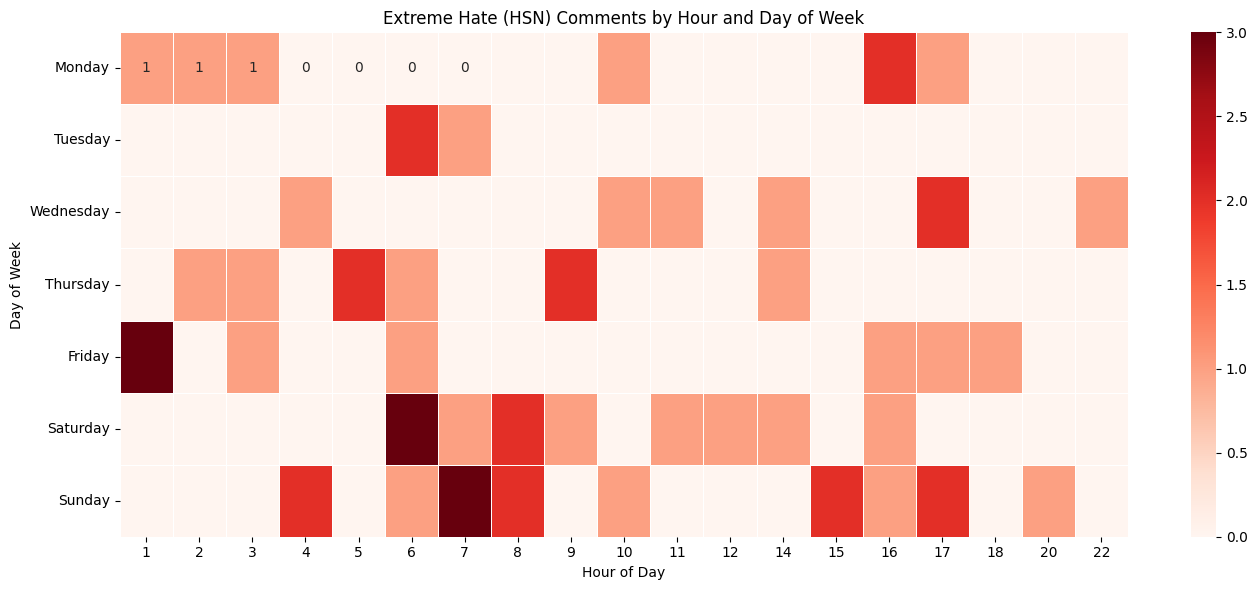

In [ ]:

df['Hour'] = df['Date'].dt.hour
df['Weekday'] = df['Date'].dt.day_name()


df['Label'] = df['Label'].astype(str).str.replace("'", "").str.strip()
df_hsn = df[df['Label'] == 'HSN']


heatmap_data = df_hsn.pivot_table(index='Weekday', columns='Hour', values='Comment', aggfunc='count').fillna(0)

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(weekday_order)


plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_data, cmap="Reds", linewidths=.5, annot=True, fmt=".0f")
plt.title("Extreme Hate (HSN) Comments by Hour and Day of Week")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.tight_layout()
plt.show()


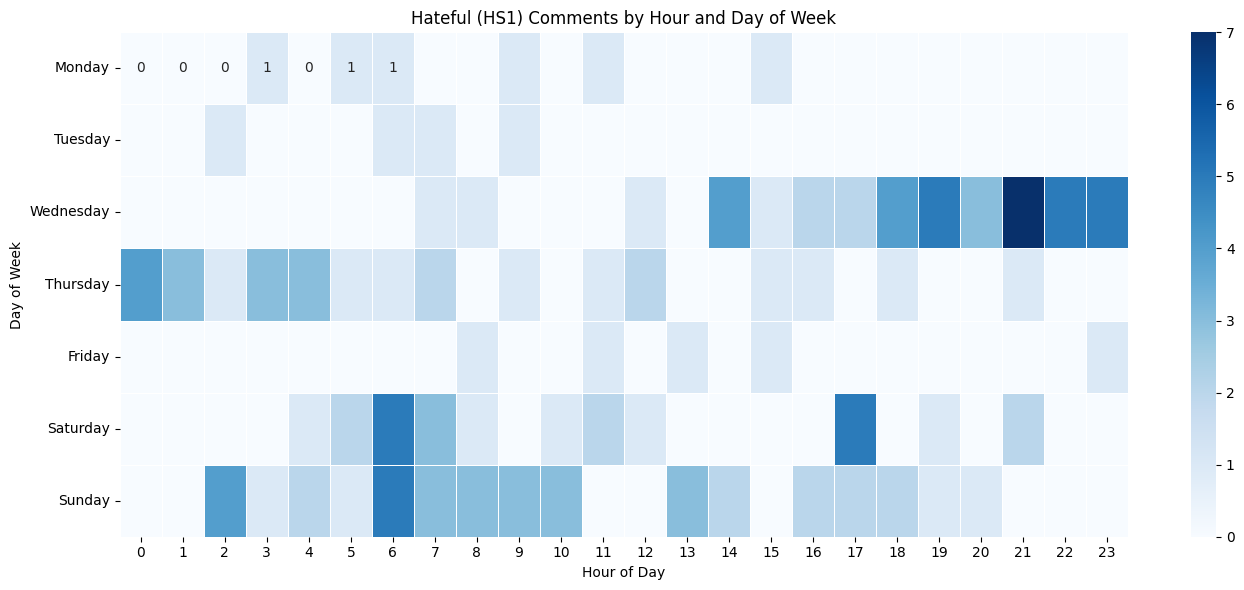

In [ ]:

df['Hour'] = df['Date'].dt.hour
df['Weekday'] = df['Date'].dt.day_name()


df['Label'] = df['Label'].astype(str).str.replace("'", "").str.strip()
df_hsn = df[df['Label'] == 'HS1']


heatmap_data = df_hsn.pivot_table(index='Weekday', columns='Hour', values='Comment', aggfunc='count').fillna(0)


weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(weekday_order)


plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_data, cmap="Blues", linewidths=.5, annot=True, fmt=".0f")
plt.title("Hateful (HS1) Comments by Hour and Day of Week")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.tight_layout()
plt.show()


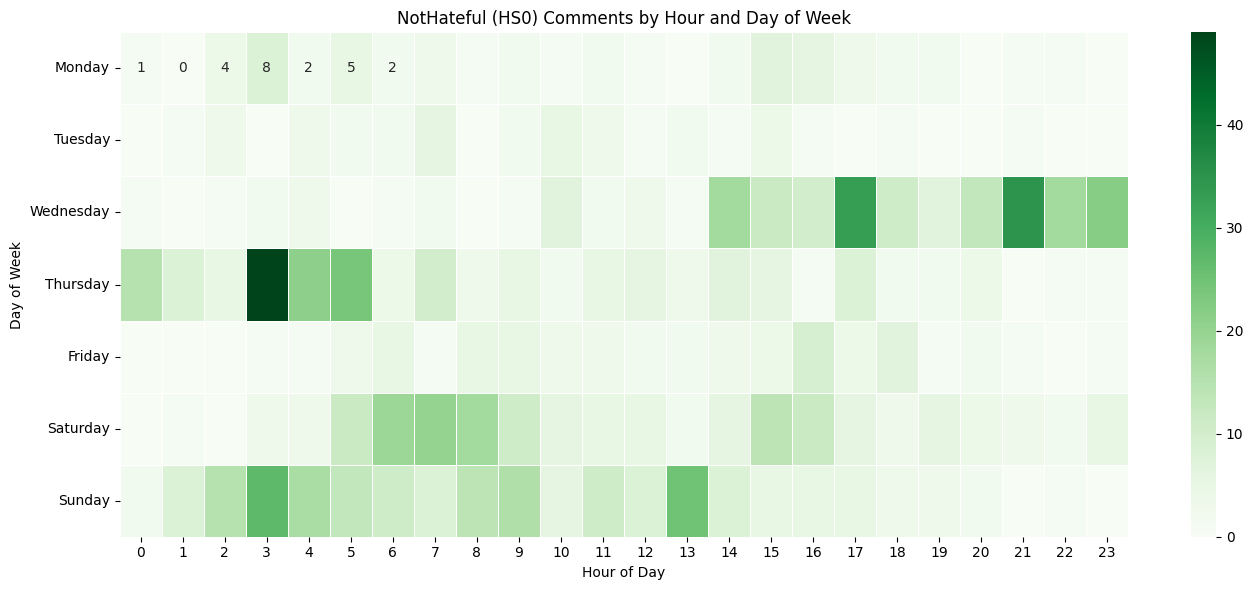

In [ ]:
df['Hour'] = df['Date'].dt.hour
df['Weekday'] = df['Date'].dt.day_name()

df['Label'] = df['Label'].astype(str).str.replace("'", "").str.strip()
df_hsn = df[df['Label'] == 'HS0']

heatmap_data = df_hsn.pivot_table(index='Weekday', columns='Hour', values='Comment', aggfunc='count').fillna(0)

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(weekday_order)


plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_data, cmap="Greens", linewidths=.5, annot=True, fmt=".0f")
plt.title("NotHateful (HS0) Comments by Hour and Day of Week")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder

df['Label'] = df['Label'].str.replace("'", "").str.strip()

label_encoder = LabelEncoder()
df['Encoded_Label'] = label_encoder.fit_transform(df['Label'])


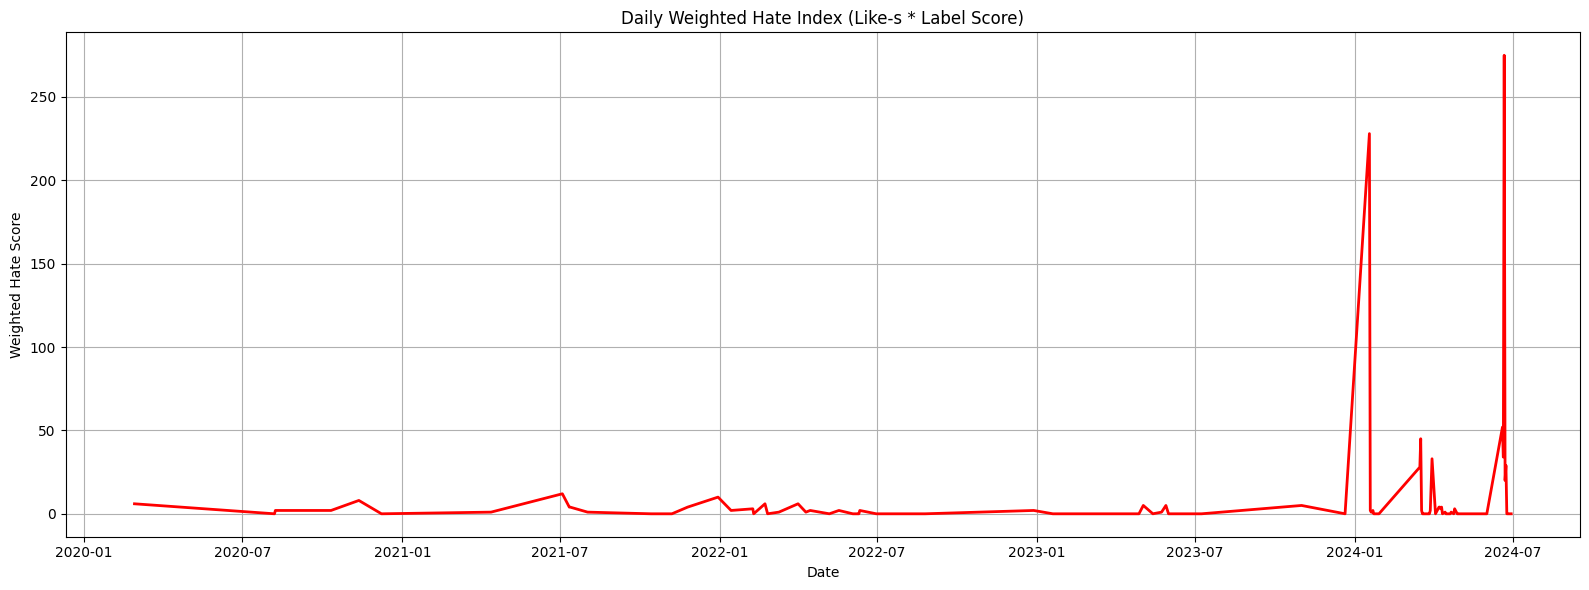

In [ ]:

df['Likes'] = pd.to_numeric(df['Likes'], errors='coerce').fillna(0)

df['Label_Score'] = df['Encoded_Label']

df['Hate_Weight'] = df['Likes'] * df['Label_Score']
weighted_hate = df.groupby(df['Date'].dt.date)['Hate_Weight'].sum()


plt.figure(figsize=(16, 6))
plt.plot(weighted_hate.index, weighted_hate.values, color='red', linewidth=2)
plt.title("Daily Weighted Hate Index (Like-s * Label Score)")
plt.xlabel("Date")
plt.ylabel("Weighted Hate Score")
plt.grid(True)
plt.tight_layout()
plt.show()
